## Tasks
1. Get the data ready
2. Split the data into train and test sets
3. Create pipelines:
    a) For performing linear regression with multiple variables
    b) For polynomial regression
4. Perform model evaluation:
    a) Using measures for in sample evaluation
    b) cross-validation score
    c) Using visual techniques
        # For MLR
        # For PR
5. Final decission: Identify the best regression model on this data set

### Getting the data ready

In [448]:
df.head()

,length,width,wheel-base,bore,horsepower,curb-weight,drive-wheels,engine-size,engine-location,city-mpg,highway-mpg,price
0,0.811148,0.890278,88.6,3.47,111.0,2548,rwd,130,front,21,27,13495.0
1,0.811148,0.890278,88.6,3.47,111.0,2548,rwd,130,front,21,27,16500.0
2,0.822681,0.909722,94.5,2.68,154.0,2823,rwd,152,front,19,26,16500.0
3,0.848630,0.919444,99.8,3.19,102.0,2337,fwd,109,front,24,30,13950.0
4,0.848630,0.922222,99.4,3.19,115.0,2824,4wd,136,front,18,22,17450.0


In [449]:
dummy_variables1 = pd.get_dummies(df['engine-location'])
dummy_variables1.rename(columns={'front':'engine-location:front', 'rear':'engine-location:rear'}, inplace=True)
df = pd.concat([df, dummy_variables1], axis=1)

dummy_variables2 = pd.get_dummies(df['drive-wheels'])
dummy_variables2.rename(columns={'rwd':'drive-wheels:rwd', 'fwd':'drive-wheels:fwd', '4wd':'drive-wheels:4wd'}, inplace=True)
df = pd.concat([df, dummy_variables2], axis=1)

df.drop(["drive-wheels","engine-location", "drive-wheels:4wd", "engine-location:rear"], axis = 1, inplace=True)

df.head()

,length,width,wheel-base,bore,horsepower,curb-weight,engine-size,city-mpg,highway-mpg,price,engine-location:front,drive-wheels:fwd,drive-wheels:rwd
0,0.811148,0.890278,88.6,3.47,111.0,2548,130,21,27,13495.0,1,0,1
1,0.811148,0.890278,88.6,3.47,111.0,2548,130,21,27,16500.0,1,0,1
2,0.822681,0.909722,94.5,2.68,154.0,2823,152,19,26,16500.0,1,0,1
3,0.848630,0.919444,99.8,3.19,102.0,2337,109,24,30,13950.0,1,1,0
4,0.848630,0.922222,99.4,3.19,115.0,2824,136,18,22,17450.0,1,0,0


In [450]:
df.shape

(201, 13)

### 2. Splitting the data: 

In [451]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, df.price, test_size = 0.2, random_state = 0)

### 3. Creating pipelines for different regression models:

#### a) Creating pipeline for Linear regression with multiple variables:

In [501]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [486]:
pipeline_MLR = Pipeline([('scale', StandardScaler()),('model', LinearRegression())])

#### b) Creating pipeline for Polynomial regression:

In [487]:
pipeline_PR = Pipeline([('scale', StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]) 

### 4. Model Evaluation: 
#### a) Measures for In-Sample Evaluation

In [488]:
# List of pipelines
pipelines = [pipeline_MLR, pipeline_PR]

best_accuracy = 0.0
best_model = 0
best_pipeline = ""

# Dictionary for pipelines and regression models for ease of reference
pipe_dict = {0: 'Multiple linear regression', 1: 'Polynomial regression'}

In [489]:
# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

for i, model in enumerate(pipelines):
    print("{} R-squared value: {}".format(pipe_dict[i], model.score(X_test, y_test)))
    print("{} Mean squared error: {}".format(pipe_dict[i], mean_squared_error(y_test,lm.predict(X_test))))
    print("")

Multiple linear regression R-squared value: 1.0
Multiple linear regression Mean squared error: 2.178914784286024e-23

Polynomial regression R-squared value: 0.9966742117220462
Polynomial regression Mean squared error: 2.178914784286024e-23



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarn

#### b) cross-validation score

In [504]:
Rcross_MLR = cross_val_score(pipeline_MLR, df, df.price, cv=5)
print("The mean of the folds are", Rcross_MLR.mean(), "and the standard deviation is" , Rcross_MLR.std())

The mean of the folds are 1.0 and the standard deviation is 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input

In [505]:
Rcross_PR = cross_val_score(pipeline_PR, df, df.price, cv=5)
print("The mean of the folds are", Rcross_PR.mean(), "and the standard deviation is" , Rcross_PR.std())

The mean of the folds are 0.9999828636169099 and the standard deviation is 3.116438589770339e-05


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input

#### c) Model Evaluation using Visualization:

##### Multiple linear regression:

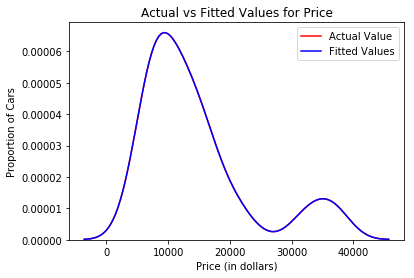

In [508]:
# Distribution plot:
width = 6
height = 4
plt.figure(figsize=(width, height))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(lm.predict(X_test), hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

##### Polynomial regression:

In [509]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

(160, 104)


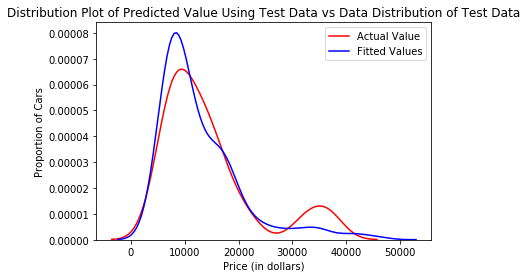

In [511]:
pr1=PolynomialFeatures(degree=2)

x_train_pr1=pr.fit_transform(X_train)
x_test_pr1=pr.fit_transform(X_test)

print(x_train_pr1.shape)

poly1=linear_model.LinearRegression().fit(x_train_pr1,y_train)

yhat_test1=poly1.predict(x_train_pr1)

# Distribution plot:
width = 6
height = 4
plt.figure(figsize=(width, height))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(yhat_test1, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

### 5. Final Decission: 

In [497]:
for i, model in enumerate(pipelines):
    if model.score(X_test, y_test)>best_accuracy:
        best_accuracy = model.score(X_test, y_test)
        best_pipeline = model
        best_model = i
        
print("Regression model with best accuracy: {}".format(pipe_dict[best_model]))

Regression model with best accuracy: Multiple linear regression


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


# THE END